In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read Source Image

In [4]:
# Read source image.
path = "../dataset/parcel_frame_1569.png"
im_src = cv2.imread(path)

# Convert BGR to RGB (OpenCV loads images in BGR)
im_rgb = cv2.cvtColor(im_src, cv2.COLOR_BGR2RGB)

## Calculate Homography

In [5]:
pts_src = np.float32([[-151, 743], [413, 497], [988, 524], [385, 893]])

# h_orig, w_orig = im_rgb.shape[:2]   # before resize
# new_size = 640
# scale_x = new_size / w_orig
# scale_y = new_size / h_orig
# pts_src_resized = pts_src.copy()
# pts_src_resized[:,0] = pts_src[:,0] * scale_x   # scale x coords
# pts_src_resized[:,1] = pts_src[:,1] * scale_y   # scale y coords

widthA = np.linalg.norm(pts_src[0] - pts_src[1])
widthB = np.linalg.norm(pts_src[2] - pts_src[3])
maxWidth = int(max(widthA, widthB))

heightA = np.linalg.norm(pts_src[0] - pts_src[3])
heightB = np.linalg.norm(pts_src[1] - pts_src[2])
maxHeight = int(max(heightA, heightB))

pts_dst  = np.float32([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]
])

# Calculate Homography
#h, status = cv2.findHomography(pts1, pts2)
matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)

print(maxWidth)

im_output = cv2.warpPerspective(im_rgb, matrix, (maxWidth, maxHeight))


706


## Display Image

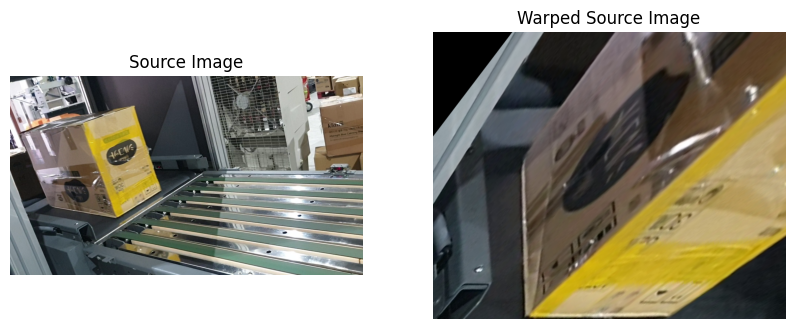

In [174]:
# Create a subplot with 1 row, 2 columns
plt.figure(figsize=(10, 5))

# First image
plt.subplot(1, 2, 1)
plt.imshow(im_rgb)
plt.title("Source Image")
plt.axis("off")

# Second image
plt.subplot(1, 2, 2)
plt.imshow(im_output)
plt.title("Warped Source Image")
plt.axis("off")

plt.show()

In [166]:
gray = cv2.cvtColor(im_output, cv2.COLOR_BGR2GRAY)

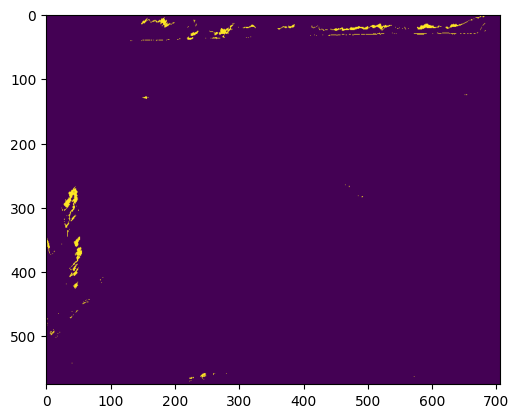

In [168]:
hsv = cv2.cvtColor(im_output, cv2.COLOR_BGR2HSV)
lower = np.array([10, 80, 50])     # brown/yellow lower bound
upper = np.array([30, 255, 100])   # adjust for your box
mask = cv2.inRange(hsv, lower, upper)

plt.imshow(hsv)
plt.imshow(mask)

In [156]:
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key=cv2.contourArea)  # largest contour = box

In [157]:
rect = cv2.minAreaRect(cnt)   # center, (w, h), angle
box = cv2.boxPoints(rect)
box = np.int32(box)

print(rect)

((46.5, 374.5), (93.0, 283.0), 0.0)


In [158]:
conveyor_px = im_output.shape[1]   # width of warped conveyor in px
mm_per_px = 700.0 / conveyor_px

w_mm = rect[1][0] * mm_per_px
h_mm = rect[1][1] * mm_per_px

In [159]:
# Label dimensions
cv2.putText(im_output, f"{w_mm:.1f} mm", tuple(box[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
cv2.putText(im_output, f"{h_mm:.1f} mm", tuple(box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [203, 204, 210],
        [198, 199, 204],
        [188, 189, 194]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [200, 201, 206],
        [187, 187, 193],
        [164, 163, 170]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [186, 186, 192],
        [163, 162, 169],
        [132, 130, 138]],

       ...,

       [[ 61,  70,  72],
        [ 53,  60,  62],
        [ 54,  60,  61],
        ...,
        [ 66,  70,  72],
        [ 68,  72,  74],
        [ 70,  74,  76]],

       [[ 76,  83,  85],
        [ 78,  84,  87],
        [ 88,  94,  95],
        ...,
        [ 67,  71,  73],
        [ 69,  73,  75],
        [ 70,  74,  76]],

       [[125, 131, 134],
        [134, 140, 141],
        [138, 144, 145],
        ...,
        [ 68,  72,  74],
        [ 69,  73,  75],
        [ 70,  74,  76]]

Box size: 92.21 mm x 280.59 mm


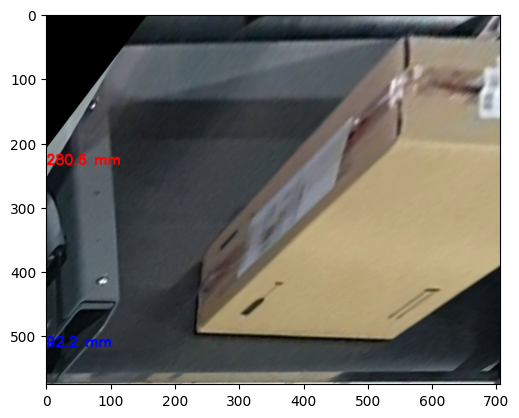

In [160]:
print(f"Box size: {w_mm:.2f} mm x {h_mm:.2f} mm")

plt.imshow(im_output)